In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

plt.style.use("https://github.com/mlefkir/beauxgraphs/raw/main/beautifulgraphs_colblind.mplstyle")

In [2]:
def autocovariance(X):
    """Compute the autocovariance of a time series.

    Parameters
    ----------
    X : np.ndarray
        Time series.

    Returns
    -------
    acv : np.ndarray
        Autocovariance of the time series.
    """
    
    n = len(X)
    mu = np.mean(X)
    x_t = X - mu # centered time series
    acv = np.zeros(n)
    for lag in range(0,n):
        x_ttau = np.roll(x_t, -lag) - mu # centered time series shifted by lag
        acv[lag] = np.mean(x_t * x_ttau)
    return acv

def power_spectrum(X):
    """Compute the power spectrum of a time series.

    Parameters
    ----------
    X : np.ndarray
        Time series.

    Returns
    -------
    ps : np.ndarray
        Power spectrum of the time series.
    freqs : np.ndarray
        Frequencies corresponding to the power spectrum.
    """
    
    n = len(X)
    X_C = X - np.mean(X) # centered time series
    freqs = np.linspace(1/n, 1/2, n//2-1)
    ps = np.abs(fft(X_C))**2
    return ps[1:n//2],freqs

/var/folders/v1/wf6l8p9j24nb6h9_03lkd984000zqy/T/ipykernel_87099/1378142141.py:21: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ax[1].stem(t, autocovariance(X),'o-', linefmt=f"C{k}",markerfmt=f'C4o',basefmt='k-')


Variance of the time series: 4.84
Sum of spectral density: 4.91


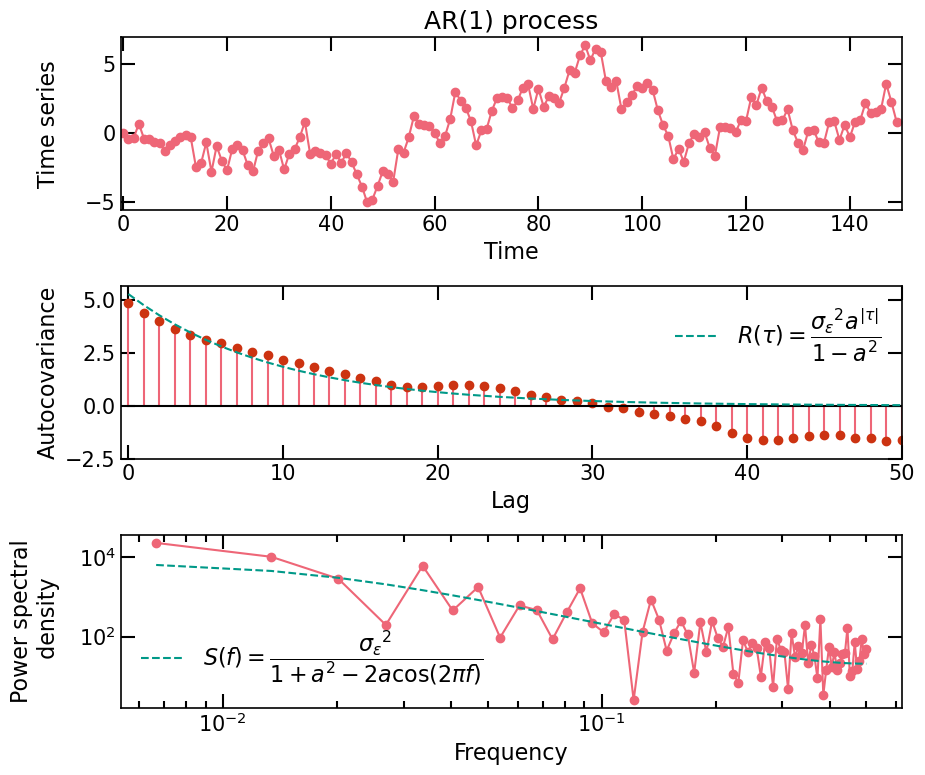

In [134]:
n = 150
t = np.arange(n)
# seed for reproducibility
key = np.random.default_rng(122)

fig , ax = plt.subplots(3,1,figsize=(9.5,8.))
for k in range(1):
    k = 10
    #---------------------------
    X = np.zeros(n)
    # Inovation process or driving noise
    sigma = 1
    E = key.normal(size=n)*sigma**2
    # Parameters of the AR(1) process
    a = .9 # autoregressive parameter must be below 1 for the process to be stationary
    # Generate the AR(1) process
    for i in range(1,n):
        X[i] = a*X[i-1] + E[i]
    #---------------------------
    ax[0].plot(t, X,'o-', color=f"C{k}")
    ax[1].stem(t, autocovariance(X),'o-', linefmt=f"C{k}",markerfmt=f'C4o',basefmt='k-')
    P,f = power_spectrum(X)
    ax[2].loglog(f, P,marker='o', color=f"C{k}")

ax[0].set_xlabel('Time')
ax[0].set_ylabel('Time series')
ax[0].set_title(r'AR(1) process')
ax[0].set_xlim(-0.5,150)

# ax[1].text(0.1, 0.65, r'${\sigma_X}^2 $='+f"{np.var(X):.2f}", transform=ax[1].transAxes)
ax[1].set_xlim(-0.5,50)
acv_model = sigma**2 /(1-a**2) * a **t
ax[1].plot(t, acv_model, color='C2',linestyle='--',  label=r'$R(\tau)=\dfrac{{\sigma_\epsilon}^2 a^{|\tau|}}{1-a^2}$')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Autocovariance')
ax[1].legend()

psd_model = sigma**2 / (1+a**2 - 2 *  a *  np.cos(2*np.pi*f))
ax[2].loglog(f, psd_model*n/2, color='C2',linestyle='--', label=r'$S(f)=\dfrac{{\sigma_\epsilon}^2}{1+a^2- 2a \cos(2\pi f)}$')
ax[2].set_xlabel('Frequency')
ax[2].set_ylabel('Power spectral\n density')
ax[2].legend()

fig.align_ylabels(ax)
fig.tight_layout()
fig.savefig('autoregressive_1.pdf')


print(f"Variance of the time series: {np.var(X):.2f}")
print(f"Sum of spectral density: {np.sum(P)*(f[1]-f[0])/n*2:.2f}")